In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

## Loading dataset 

In [3]:
data = pd . read_excel ( 'process_data.xlsx' , index = False )
data . head ( )

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,2,2,25,1,2,72,72,74,218
1,2,3,15,1,1,69,90,88,247
2,2,2,30,1,2,90,95,93,278
3,1,1,20,2,2,47,57,44,148
4,1,3,15,1,2,76,78,75,229


## Making Feature Set

In [4]:
X = data [ [ 'gender' ,'lunch','parental_level_of_education','group'] ]
 
Y = data . writing_score
Y [ 0 : 5 ]

0    74
1    88
2    93
3    44
4    75
Name: writing_score, dtype: int64

## Spliting Dataset for Training and Testing Model


In [5]:
from sklearn . model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split ( X , Y , test_size = 0.2 , random_state = 42 )
xlabels = []
ylabels = []

## Using Support Vector Mechine Classifier

In [6]:
import sklearn
from sklearn import svm

smodel = svm . SVR (  kernel = 'rbf')
smodel . fit ( X_train , y_train )

from sklearn.metrics import classification_report
y_pred = smodel . predict ( X_test )

print ( 'accuracy :' ,smodel.score ( X_test , y_test ) )

xlabels . append ( "SVM" )
ylabels . append (smodel.score ( X_test , y_test ) )

accuracy : 0.0964259788019598


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.score(X_test, y_test)) 
print(regressor.coef_) 
xlabels . append ( "linear regression" )
ylabels . append ( regressor.score(X_test, y_test) )

0.19550305287363678
[ 9.08421051 -8.3715142   0.55657526  1.62885298]


## Ploting Accuracy

In [13]:
df_performance = pd . DataFrame ()
df_performance ['Models'] = [ 'SVR' , 'Linear Regression' ]
df_performance ['Accuracy'] = [ 0.0964259788019598 , 0.19550305287363678 ]
df_performance . set_index ( 'Models' , drop = True , inplace = True )

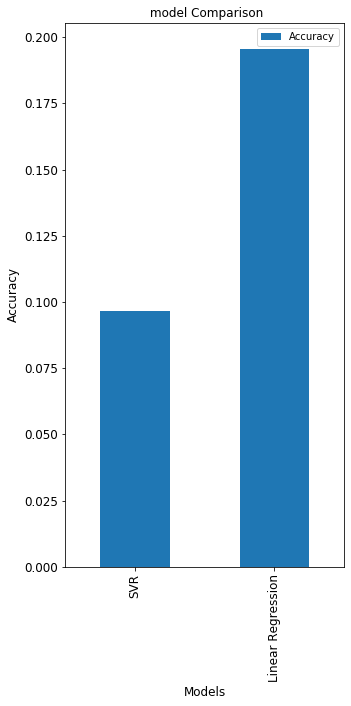

In [12]:
ax = df_performance ['Accuracy'] . plot ( kind='bar' , title = " model Comparison" , figsize = (5, 10) , legend = True, fontsize = 12 )
ax . set_xlabel ("Models", fontsize = 12 )
ax . set_ylabel ("Accuracy", fontsize = 12 )
plt . show ()